## Ex 3.12 (Computer Vision: Algorithms and Applications 2nd Edition by Richard Szeliski): Sharpening, blur, and noise removal. 
Implementsome softening, sharpening, and non-linear diffusion (selective sharpening or noise removal) filters, such as Gaussian, median, and bilateral (Section 3.3.1), as discussed in Section 3.4.2.
Take blurry or noisy images (shooting in low light is a good way to get both) and try to
improve their appearance and legibility.

In [1]:
from PIL import Image,ImageFilter  # import the pil 

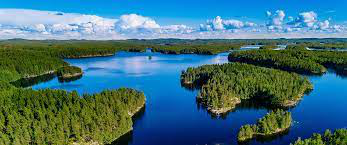

In [2]:
# Open image
image_original = Image.open(r"download.jpg")
display(image_original)

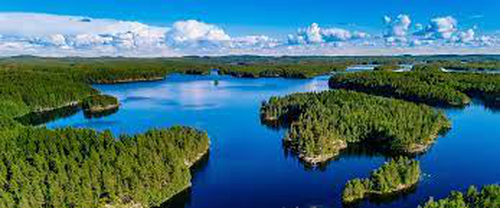

In [3]:
# resize the image
basewidth = 500
wpercent = (basewidth/float(image_original.size[0]))
hsize = int((float(image_original.size[1])*float(wpercent)))
image_original = image_original.resize((basewidth,hsize), Image.ANTIALIAS)
display(image_original)

### sharpen filter

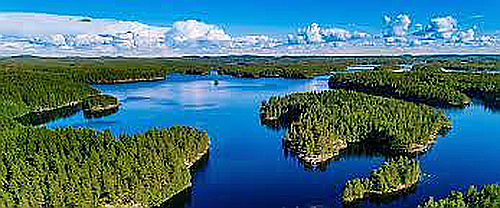

In [4]:
# Apply sharp filter
image_sharpened1 = image_original.filter(ImageFilter.SHARPEN)
# Apply another sharp filter to teh sharp image
image_sharpened2 = image_sharpened1.filter(ImageFilter.SHARPEN)
display(image_sharpened2)

In [5]:
image_original.size

(500, 208)

### blur

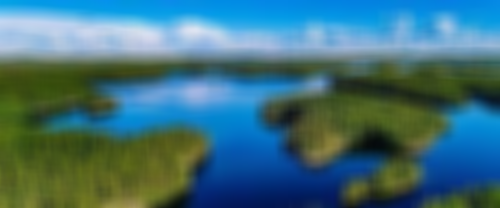

In [6]:
# aplly image blur filter
Image_blur = image_original.filter(ImageFilter.BoxBlur(8))
display(Image_blur)


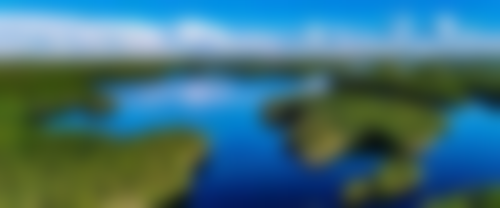

In [7]:
# aplly image Gaussian Blur filter
Image_blur = image_original.filter(ImageFilter.GaussianBlur(radius=8))
display(Image_blur)

### noise removal

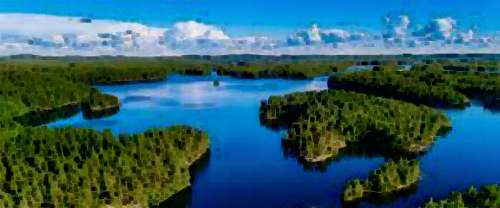

In [8]:
image_noise_removal = image_original.filter(ImageFilter.MinFilter)
display(image_noise_removal)

### Unsharp

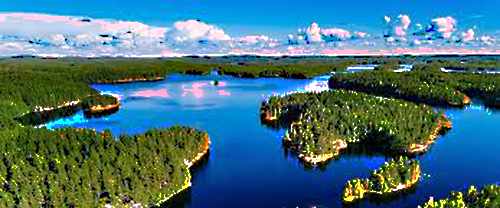

In [9]:
# apply UnsharpMask filter
image_Unsharp = image_original.filter(ImageFilter.UnsharpMask(radius=9, percent=500, threshold=50))

display(image_Unsharp)

In [111]:
img = image_original.convert('RGB')

width, height = img.size

pixels = img.load()

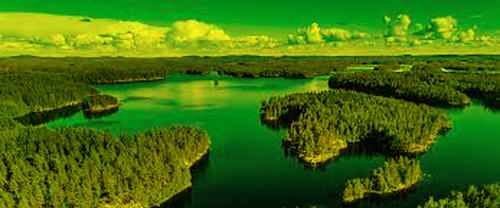

In [106]:
for px in range(width):
    for py in range(height):
        r, g , b = img.getpixel((px,py))
        img.putpixel((px,py),(r,g,int(b*0.1)))
            
display(img)

In [124]:
images_red =[]
width, height = img.size

for i in [0.1, 0.5, 0.9]:
    for px in range(width):
        for py in range(height):
            r, g , b = img.getpixel((px,py))
            img.putpixel((px,py),(int(r*i),g,b))
            
    images_red.append(img)

In [125]:
images_red

[<PIL.Image.Image image mode=RGB size=500x208 at 0x22162811E20>,
 <PIL.Image.Image image mode=RGB size=500x208 at 0x22162811E20>,
 <PIL.Image.Image image mode=RGB size=500x208 at 0x22162811E20>]

In [126]:
# !pip install ipyplot


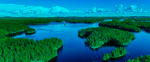
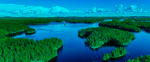
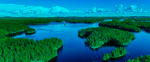


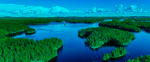
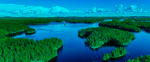
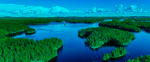

In [127]:
import ipyplot

ipyplot.plot_images(images_red)

In [104]:
for i in [0.1, 0.5, 0.9]:
    print(i)

0.1
0.5
0.9
